# 初心者のための TensorFlow 2.0 入門
- [初心者のための TensorFlow 2.0 入門](https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ja)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# 画像(0~9の数値)認識のためのデータセット
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# 0-1の範囲に修正
x_train, x_test = x_train / 255, x_test / 255
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
# 機械学習モデルの構築
model = tf.keras.models.Sequential([
    # 28x28の元データを784の縦ベクトルに変換
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # 784x128の行列に変換
    tf.keras.layers.Dense(128, activation="relu"),
    # レイヤーから出力された特徴量に対してランダムにゼロ化する割合を指定
    tf.keras.layers.Dropout(0.2),
    # 128x10の行列に変換
    tf.keras.layers.Dense(10),
    ])

model.summary()

c:\Users\JY810251\python\TensorFlow_training\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# モデルにトレーニングデータを1つ入れて予測する
prediction = model(x_train[:1])
prediction

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[ 0.73558027,  0.05557445, -0.18703012, -0.12792963, -0.04840171,
        -0.08756482,  0.318367  , -0.7220376 , -0.6028804 ,  0.6087073 ]],
      dtype=float32)>

In [6]:
# 予測結果にソフトマックス関数を適用
probabilities = tf.nn.softmax(prediction)
probabilities

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.19025256, 0.09638461, 0.0756216 , 0.08022559, 0.08686633,
        0.08353011, 0.1253537 , 0.04428892, 0.04989355, 0.16758311]],
      dtype=float32)>

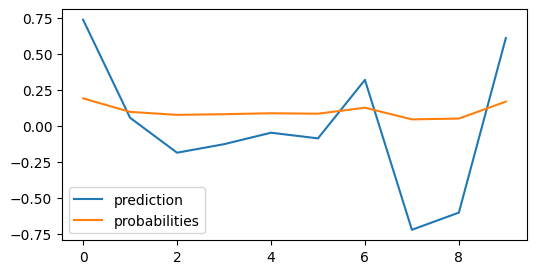

In [7]:
plt.figure(figsize=(6, 3))
plt.plot(prediction.numpy()[0], label='prediction')
plt.plot(probabilities.numpy()[0], label='probabilities')
plt.legend()
plt.show()
# prediction_softmax.numpy()[0]

In [8]:
# 損失関数の計算 5の確率が0.06943263により対数をとる
print(tf.math.log(0.06943263))
print(tf.math.log(probabilities[0][y_train[:1][0]]))

tf.Tensor(-2.6673982, shape=(), dtype=float32)
tf.Tensor(-2.482548, shape=(), dtype=float32)


In [9]:
# 損失関数の定義(上の数値と一致する)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], prediction).numpy()

2.482548

In [10]:
# モデルの構成とコンパイル 学習時のモデルを設定する
model.compile(
    # 最適化をadamに設定
    optimizer='adam',
    # 損失関数を loss_fnに設定
    loss=loss_fn,
    # モデルの評価指数を正解率に設定
    metrics=['accuracy']
)

In [11]:
# 損失最小化のためのパラメータフィット
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8557 - loss: 0.4847
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9557 - loss: 0.1482
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9672 - loss: 0.1087
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9734 - loss: 0.0885
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9776 - loss: 0.0729


In [12]:
# テストセットによりパフォーマンス確認
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.9797 - loss: 0.0687


[0.06872864067554474, 0.9797000288963318]

In [13]:
# モデルが確率を返すようにソフトマックス関数を設定
probaility_model = tf.keras.Sequential([model, tf.keras.layers.Softmax(),])

In [14]:
# 正解と予測結果の表示
display_num = 30
predict_result = probaility_model(x_test).numpy()
print('正解')
for i, y in enumerate(y_test[:display_num]):
    print(y, end=', ')
print()
print('予測')
for i, p in enumerate(predict_result[:display_num]):
    print(np.argmax(p), end=', ')

正解
7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 
予測
7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 

In [15]:
# 正解割合の表示
count = 0
for i, (y, p) in enumerate(zip(y_test, predict_result)):
    if y != np.argmax(p):
        count += 1
print(f'{count / len(y_test) * 100}%')

2.03%


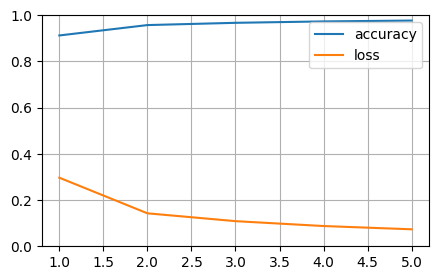

In [28]:
df = pd.DataFrame(history.history)
df.index = [i+1 for i in range(5)]
df.plot(figsize=(5, 3))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()